In [37]:
import os 
import sys
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline  

In [ ]:
proj_path = os.path.abspath("..")
sys.path.append(proj_path)

import pprint
pprint.pprint(sys.path)

In [2]:
from arguments import get_args
sys.argv = ['']
args = get_args()
print(args)

Namespace(seed=0, info='', env_name='MontezumaRevengeNoFrameskip-v4', num_stacks=8, num_steps=400, test_steps=2000, num_frames=100000, log_interval=10, save_img=True, save_interval=10, play_game=False, epsilon=0, lr=0.001, train_bs=128, eval_bs=256, epochs=500, reset_collection=False, data_collector='rnd', data_dir='./data', train_ratio=0.8, rl_log_interval=5, data_size=20000, rnd_model_dir='./rnd', lam=0.95, num_worker=1, num_step=128, ppo_eps=0.1, epoch=4, mini_batch=4, learning_rate=0.0001, entropy_coef=0.001, gamma=0.999, clip_grad_norm=0.5, sticky_action=True, action_prob=0.25, life_done=False, env_type='atari', env_id='MontezumaRevengeNoFrameskip-v4', max_step_per_episode=4500, ext_coef=2.0, int_coef=1.0, int_gamma=0.99, stable_eps=1e-08, state_stack_size=4, preproc_height=84, preproc_width=84, use_gae=True, use_gpu=True, use_norm=False, use_noisy_net=False, update_proportion=0.25, obs_norm_step=50)


In [3]:
from expert import ExpertDataCollector, Data_Collector
from env import Env
env = Env(args.env_name, args.num_stacks)
data_collector = ExpertDataCollector(env=env, agent=None, args=args)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [46]:
data_collector.load("/home/sorceryyy/homework/first_sem/rl/code/data/expert_data_epsilon0.0.pkl")
data_collector.info()
def display_images(original_image, processed_image):
    """
    Display the original image and processed image side by side.
    """
    # Create a figure to show both images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image (before preprocessing)
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display the processed image (after preprocessing)
    axes[1].imshow(processed_image, cmap='gray')
    axes[1].set_title('Processed Image (0-1 Range)')
    axes[1].axis('off')

    plt.show()

Data loaded from /home/sorceryyy/homework/first_sem/rl/code/data/expert_data_epsilon0.0.pkl
dataset info: traj num22, mean 4054.5454545454545, std: 652.07868510652 


169 action: 3


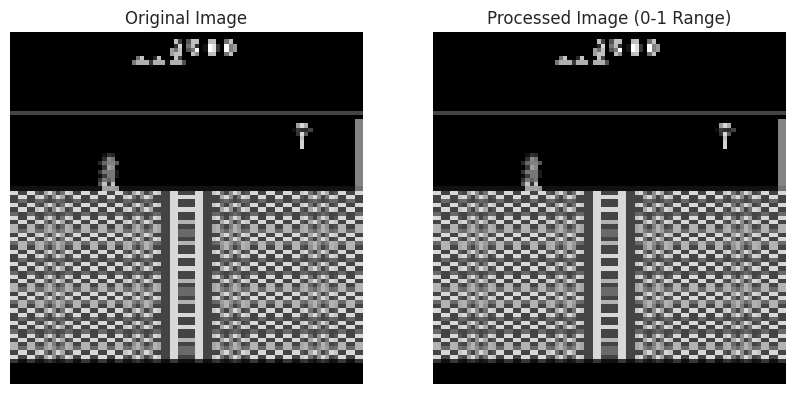

KeyboardInterrupt: 

In [47]:
# display image
for i, (obs, action) in enumerate(zip(data_collector.obses, data_collector.actions)):
    if i < 0:
        continue
    obs = obs[3]
    # 清除以前的输出
    clear_output(wait=True)
    print(i, f"action: {action}")
    display_images(obs*255, obs)
    plt.pause(0.1)

In [44]:
# show env
obs, _ =env.reset()
for i in range(500):
    action = env.action_space.sample()  # Choose a random action

    obs_next, reward, done, truncated, _ = env.step(action)  # Step in the environment

    clear_output(wait=True)
    print(i, f"action: {action}")
    display_images(obs[3], obs_next[3])
    plt.pause(0.1)
    
    obs = obs_next

    if done or truncated:
        obs, _ = env.reset()

105 action: 4


KeyboardInterrupt: 